<a href="https://colab.research.google.com/github/Joshitha475/ML-labs/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 63450642205.65561


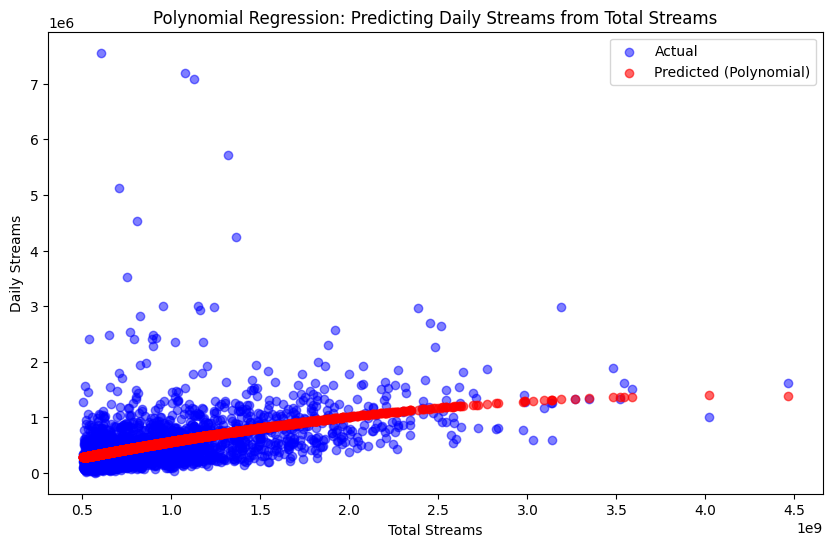

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
spotify_data = pd.read_csv('spotify_data.csv')

# Clean the data by removing missing values
spotify_data_cleaned = spotify_data.dropna()

# Separate predictor (Streams) and target (Daily)
X = spotify_data_cleaned[['Streams']]
y = spotify_data_cleaned['Daily']

# Create polynomial features (degree 2 for quadratic regression, increase for higher degrees)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on polynomial features
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# For plotting a smoother line, let's use the entire dataset for predictions
X_full_poly = poly.fit_transform(X)
y_full_pred = model.predict(X_full_poly)

# Plot the results
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual', alpha=0.5)

# Plot the polynomial regression line
plt.scatter(X, y_full_pred, color='red', label='Predicted (Polynomial)', alpha=0.6)

plt.title('Polynomial Regression: Predicting Daily Streams from Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Daily Streams')
plt.legend()

# Show the plot
plt.show()
